In [1]:
import os, cv2
import numpy as np
from numpy import fft
import nibabel as nib
from matplotlib import pyplot as plt
from utils import *
%matplotlib inline

C:\Users\user\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\user\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\user\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
ROOT = './interpolation/'
PAT_LISTS = sorted(os.listdir(ROOT))

In [6]:
t1, dante = load_nii_multi(ROOT+PAT_LISTS[0])
h, w, s = dante.shape

In [50]:
v_split_s = np.array(np.dsplit(dante, s/6))
print(v_split_s.shape, v_split_s.dtype)
plane_mean = v_split_s.mean(-1)
print(plane_mean.shape, plane_mean.dtype)

(28, 256, 256, 6) float32
(28, 256, 256) float32


In [51]:
kspace = np.array([fft.fftn(dante[...,i]) for i in range(s)])
kspace = np.transpose(kspace, [1, 2, 0])
v_split_k = np.array(np.dsplit(kspace, s/6))
print(v_split_k.shape, v_split_k.dtype)
kspace_mean = v_split_k.mean(-1)
print(kspace_mean.shape, kspace_mean.dtype)
kspace_mean2plane = np.abs(np.array([fft.ifftn(i) for i in kspace_mean]))
print(kspace_mean2plane.shape, kspace_mean2plane.dtype)

(28, 256, 256, 6) complex64
(28, 256, 256) complex64
(28, 256, 256) float32


Text(0.5, 1.0, '-0.00015, 0.00018')

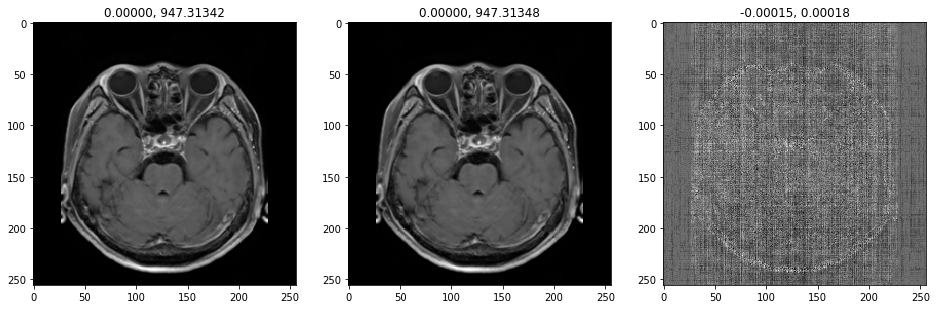

In [66]:
idx = 9
err = plane_mean[idx]-kspace_mean2plane[idx]
plt.figure(figsize=(16, 8))
plt.subplot(131)
plt.imshow(plane_mean[idx], cmap='gray')
plt.title("%.5f, %.5f"%(plane_mean[idx].min(), plane_mean[idx].max()))
plt.subplot(132)
plt.imshow(kspace_mean2plane[idx], cmap='gray')
plt.title("%.5f, %.5f"%(kspace_mean2plane[idx].min(), kspace_mean2plane[idx].max()))
plt.subplot(133)
plt.imshow(err, cmap='gray')
plt.title("%.5f, %.5f"%(err.min(), err.max()))